# **What is useMemo in Simple Terms?**

useMemo is a React Hook that remembers the result of a function so it doesn’t have to run again unless needed.

It helps improve performance by avoiding unnecessary calculations.

# **Simple Rule:**

✔ If an object is inside the component → It recreates on every render.

✔ Use useMemo to keep the same object across renders.

🚀 This improves performance and avoids unnecessary renders! Let me know if you need more



```
import React, { useState, useMemo, useEffect } from "react";

const Final = () => {
  const [number, setNumber] = useState(0);
  const [dark, setDark] = useState(false);
  const [doubleNumber, setDoubleNumber] = useState(0);

  // ✅ Run slow function asynchronously (does not freeze UI)
  useEffect(() => {
    const computeDouble = async () => {
      const result = await slowFunction(number);
      setDoubleNumber(result);
    };
    computeDouble();
  }, [number]);

  // ✅ Memoized theme object (prevents unnecessary re-renders)
  const themeChange = useMemo(() => ({
    backgroundColor: dark ? "black" : "white",
    color: dark ? "white" : "black",
    padding: "10px",
    borderRadius: "5px",
    transition: "0.3s ease-in-out",
  }), [dark]);

  // ✅ Logs only when theme changes
  useEffect(() => {
    console.log("Theme changed!");
  }, [dark]);

  return (
    <>
      {/* ✅ Input works instantly */}
      <div>
        <input
          type="number"
          name="number"
          id="number"
          value={number}
          onChange={(e) => setNumber(Number(e.target.value))}
        />
      </div>
      <br />

      {/* ✅ Button toggles dark mode */}
      <div>
        <button onClick={() => setDark((prevDark) => !prevDark)}>Change Theme</button>
      </div>

      {/* ✅ Displays computed number with correct theme */}
      <h2 style={themeChange}>The Number: {doubleNumber}</h2>
    </>
  );
};

// ✅ Optimized slow function: Uses `setTimeout` to prevent UI freeze
const slowFunction = (number) => {
  console.log("Slow function running...");
  return new Promise((resolve) => {
    setTimeout(() => resolve(number * 2), 100); // Simulates a delay without freezing UI
  });
};

export default Final;

```



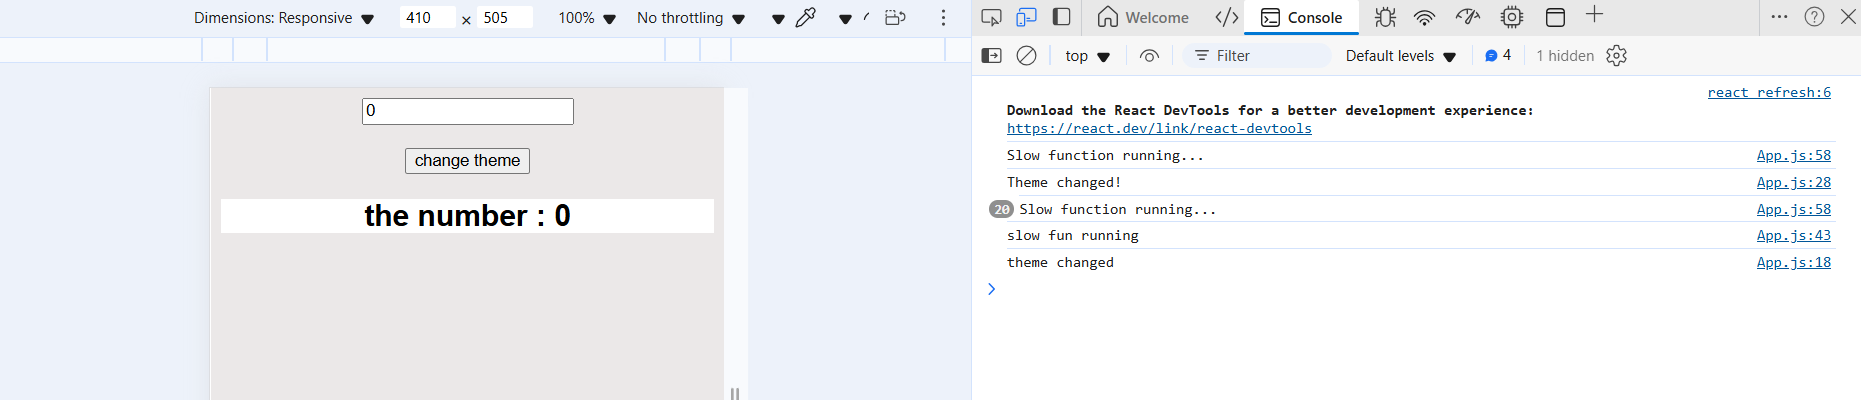

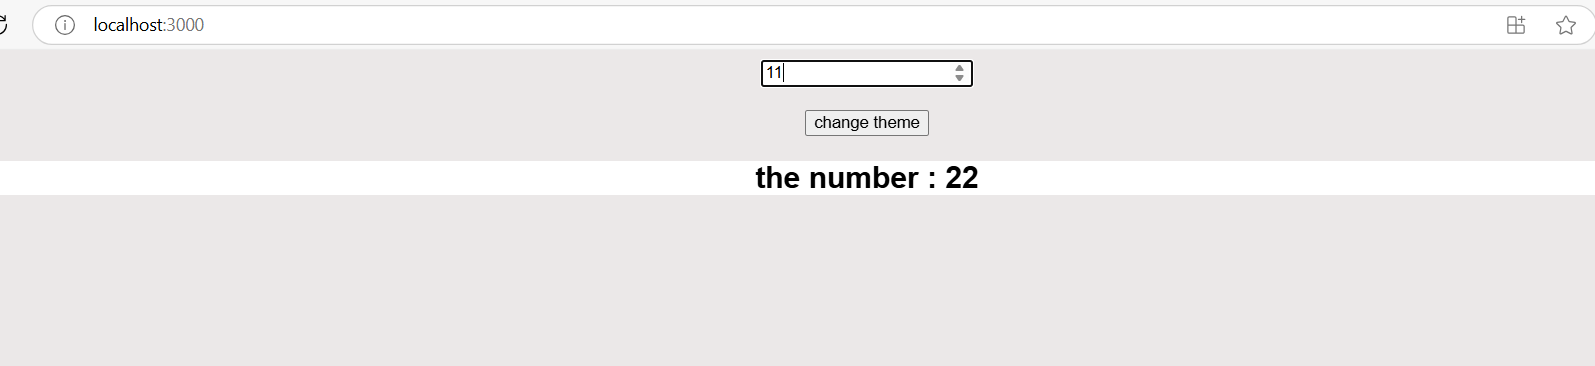

# **Summary of Fix**

✔ Before: "Theme changed!" logged even when the number changed (because themeChange was recreated).

✔ After: "Theme changed!" logs only when the theme changes (because useEffect watches dark, not themeChange).